# Quels sont les d√©terminants d‚Äôune commande √† risque sur Amazon, et comment un mod√®le de machine learning peut-il permettre de pr√©dire les annulations afin d‚Äôoptimiser la logistique et la satisfaction client ?

## Pr√©paration de la variable cible

In [78]:
pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('Amazon Sale Report.csv')

/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/2474663059.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [81]:
df

index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0        Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1        Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2          Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3        Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4          Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   
...           ...            ...                ...      ...              ...   
128970     Amazon      Amazon.in          Expedited  JNE3697    JNE3697-KR-XL   
128971     Amazon      Amazon.in          Expedited   SET401   SET401-KR-NP-M   
128972     Amazon      Amazon.in          Expedited    J0157     J0157-DR-XXL   
128973     Amazon      Amazon.in          Expedited    J0012     J0012-SKD-XS   
128974     Amazon      Amazon.in          Expedited    J0003      J0003-SET-S   

             Category  ... currency   Amount    ship-city    ship-state  \
0                 Set  ...      INR   647.62       MUMBAI   MAHARASHTRA   
1               kurta  ...      INR   406.00    BENGALURU     KARNATAKA   
2               kurta  ...      INR   329.00  NAVI MUMBAI   MAHARASHTRA   
3       Western Dress  ...      INR   753.33   PUDUCHERRY    PUDUCHERRY   
4                 Top  ...      INR   574.00      CHENNAI    TAMIL NADU   
...               ...  ...      ...      ...          ...           ...   
128970          kurta  ...      INR   517.00    HYDERABAD     TELANGANA   
128971            Set  ...      INR   999.00     GURUGRAM       HARYANA   
128972  Western Dress  ...      INR   690.00    HYDERABAD     TELANGANA   
128973            Set  ...      INR  1199.00        Halol       Gujarat   
128974            Set  ...      INR   696.00       Raipur  CHHATTISGARH   

       ship-postal-code  ship-country  \
0              400081.0            IN   
1              560085.0            IN   
2              410210.0            IN   
3              605008.0            IN   
4              600073.0            IN   
...                 ...           ...   
128970         500013.0            IN   
128971         122004.0            IN   
128972         500049.0            IN   
128973         389350.0            IN   
128974         492014.0            IN   

                                            promotion-ids    B2B  \
0                                                     NaN  False   
1       Amazon PLCC Free-Financing Universal Merchant ...  False   
2            IN Core Free Shipping 2015/04/08 23-48-5-108   True   
3                                                     NaN  False   
4                                                     NaN  False   
...                                                   ...    ...   
128970                                                NaN  False   
128971       IN Core Free Shipping 2015/04/08 23-48-5-108  False   
128972                                                NaN  False   
128973       

In [82]:
print(df.columns.tolist())

['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [83]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [85]:
variables_cles = ['Amount', 'Status', 'Order ID']
df = df.dropna(subset=variables_cles)

In [86]:
def simplify_status(status):
    failed_statuses = [
        'Cancelled',
        'Shipped - Returned to Seller',
        'Shipped - Rejected by Buyer',
        'Shipped - Lost in Transit',
        'Shipped - Returning to Seller',
        'Shipped - Damaged'
    ]
    return 1 if status in failed_statuses else 0

df['cancellation_risk'] = df['Status'].apply(simplify_status)


/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/2122486053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cancellation_risk'] = df['Status'].apply(simplify_status)


In [87]:
df

index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0        Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1        Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2          Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3        Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4          Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   
...           ...            ...                ...      ...              ...   
128970     Amazon      Amazon.in          Expedited  JNE3697    JNE3697-KR-XL   
128971     Amazon      Amazon.in          Expedited   SET401   SET401-KR-NP-M   
128972     Amazon      Amazon.in          Expedited    J0157     J0157-DR-XXL   
128973     Amazon      Amazon.in          Expedited    J0012     J0012-SKD-XS   
128974     Amazon      Amazon.in          Expedited    J0003      J0003-SET-S   

             Category  ...   Amount    ship-city    ship-state  \
0                 Set  ...   647.62       MUMBAI   MAHARASHTRA   
1               kurta  ...   406.00    BENGALURU     KARNATAKA   
2               kurta  ...   329.00  NAVI MUMBAI   MAHARASHTRA   
3       Western Dress  ...   753.33   PUDUCHERRY    PUDUCHERRY   
4                 Top  ...   574.00      CHENNAI    TAMIL NADU   
...               ...  ...      ...          ...           ...   
128970          kurta  ...   517.00    HYDERABAD     TELANGANA   
128971            Set  ...   999.00     GURUGRAM       HARYANA   
128972  Western Dress  ...   690.00    HYDERABAD     TELANGANA   
128973            Set  ...  1199.00        Halol       Gujarat   
128974            Set  ...   696.00       Raipur  CHHATTISGARH   

        ship-postal-code ship-country  \
0               400081.0           IN   
1               560085.0           IN   
2               410210.0           IN   
3               605008.0           IN   
4               600073.0           IN   
...                  ...          ...   
128970          500013.0           IN   
128971          122004.0           IN   
128972          500049.0           IN   
128973          389350.0           IN   
128974          492014.0           IN   

                                            promotion-ids    B2B fulfilled-by  \
0                                                     NaN  False    Easy Ship   
1       Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship   
2            IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN   
3                                                     NaN  False    Easy Ship   
4                                                     NaN  False          NaN   
...                                                   ...    ...          ...   
128970                                                NaN  False          NaN   
128971       IN Core Free Shipping 2015/04/08 23-48-5-108  False          NaN   
128972                                                NaN  False        

In [88]:
variables = ['Category', 'ship-state', 'ship-service-level', 'fulfilled-by']

summary_tables = {}

for var in variables:
    summary = df.groupby(var)['cancellation_risk'].agg(['count', 'mean']).reset_index()
    summary.columns = [var, 'Nombre de commandes', 'Taux de risque']
    summary = summary.sort_values('Taux de risque', ascending=False)
    summary_tables[var] = summary

# Affichage des r√©sultats
for var, table in summary_tables.items():
    print(f"\nAnalyse de la variable : {var}\n")
    print(table.head(10))


Analyse de la variable : Category

        Category  Nombre de commandes  Taux de risque
7  Western Dress                14704        0.114187
1         Bottom                  420        0.111905
5            Set                47042        0.107245
8          kurta                46717        0.105936
0         Blouse                  881        0.098751
6            Top                10165        0.094638
3   Ethnic Dress                 1093        0.087832
4          Saree                  155        0.083871
2        Dupatta                    3        0.000000

Analyse de la variable : ship-state

            ship-state  Nombre de commandes  Taux de risque
32           Meghalaya                    2        1.000000
51           Rajshthan                    2        0.500000
5    Arunachal Pradesh                    3        0.333333
39              Odisha                   20        0.250000
25         LAKSHADWEEP                    4        0.250000
30             MIZORAM    

In [20]:
df['cancellation_risk'].value_counts(normalize=True) * 100

cancellation_risk
0    84.14654
1    15.85346
Name: proportion, dtype: float64

La classe majoritaire (0) domine tr√®s nettement, ce qui est courant dans les datasets li√©s √† la d√©tection de fraudes ou d‚Äô√©checs.

Cela refl√®te probablement une r√©alit√© m√©tier : la plupart des commandes se passent bien.

‚ö†Ô∏è Points √† surveiller :

D√©s√©quilibre de classes : 16 % de classe minoritaire, ce n‚Äôest pas extr√™me, mais √ßa peut poser probl√®me en machine learning. Un mod√®le na√Øf pourrait pr√©dire ¬´ toujours 0 ¬ª et avoir une bonne accuracy, tout en √©tant inutile.

Il faudra donc :

utiliser des m√©triques adapt√©es comme le F1-score, recall, ou precision (et pas juste la pr√©cision globale),

envisager un r√©√©chantillonnage (oversampling de la classe 1, undersampling de la classe 0, ou SMOTE),

tester des mod√®les robustes aux d√©s√©quilibres (comme XGBoost avec scale_pos_weight).

### R√©√©chantillonage

In [21]:
df_majority = df[df['cancellation_risk'] == 0]
df_minority = df[df['cancellation_risk'] == 1]

Undersampling de la majorit√© (r√©duire les 0)

In [24]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority,
                                   replace=False,   # sans duplication
                                   n_samples=len(df_minority),  # m√™me taille que la classe 1
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

Oversampling de la minorit√© (augmenter les 1)

In [25]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,      # avec duplication
                                 n_samples=len(df_majority),  # m√™me taille que la classe 0
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

V√©rifier la nouvelle r√©partition

In [26]:
df_balanced['cancellation_risk'].value_counts(normalize=True) * 100

cancellation_risk
0    50.0
1    50.0
Name: proportion, dtype: float64

### Pr√©traitement des donn√©es

| Variable            | Description                                                      | Pertinence                                                                 |
|---------------------|------------------------------------------------------------------|----------------------------------------------------------------------------|
| Sales Channel       | Plateforme d'achat de la commande (Amazon, vendeur tiers‚Ä¶).     | Influence sur la fiabilit√© du traitement de commande.                     |
| ship-service-level  | Niveau de service de livraison (Standard, Expedited‚Ä¶).          | Peut impacter le taux de r√©ussite ou de retour.                           |
| Category            | Cat√©gorie de produit (kurta, top, dress‚Ä¶).                      | Certaines cat√©gories sont plus sujettes aux annulations.                 |
| Amount              | Montant de la commande en roupies (INR).                        | Les extr√™mes de prix peuvent refl√©ter un risque diff√©rent.               |
| ship-state          | √âtat/r√©gion de livraison en Inde.                               | Comportement d'achat et logistique varient selon la r√©gion.              |
| B2B                 | Commande B2B (True) ou B2C (False).                              | B2B a des comportements distincts du B2C.                                |
| fulfilled-by        | Entit√© responsable de la livraison (Amazon, vendeur‚Ä¶).          | Le prestataire impacte la qualit√© de la livraison.                       |


In [30]:
features = [
    'Sales Channel ',
    'ship-service-level',
    'Category',
    'Amount',
    'ship-state',
    'B2B',
    'fulfilled-by'
]
X = df_balanced[features]
y = df_balanced['cancellation_risk']

### Encodage des variables cat√©gorielles 
Transformer des valeurs textuelles (qualitatives) en valeurs num√©riques exploitables par le mod√®le, sans perdre d'informat

In [31]:
from sklearn.preprocessing import LabelEncoder #LabelEncoder outil qui transforme du texte en nombres entiers

X = X.copy() #cr√©e une copie de X pour √©viter de modifier l‚Äôoriginal directement
for col in X.select_dtypes(include='object').columns: #On parcourt toutes les colonnes de type texte (object) dans X
    le = LabelEncoder() #Pour chaque colonne texte, on cr√©e un encodeur LabelEncoder
    X[col] = le.fit_transform(X[col].astype(str)) #le.fit_transform(...) : transforme les valeurs texte ‚Üí nombres entiers uniques. astype(str) : s‚Äôassure que toutes les valeurs sont bien des cha√Ænes de caract√®res (m√™me s‚Äôil y a des NaN)

## Mod√®le Random Forest

### S√©paration train/test

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entra√Ænement du mod√®le

Random Forest, c‚Äôest plein de petits arbres qui posent chacun leurs questions, et √† la fin ils votent tous ensemble pour dire si la commande est √† risque ou non. Pendant l'entra√Ænement, Random Forest apprend √† reconna√Ætre les sch√©mas qui m√®nent √† une annulation.
Pendant le test, il reconna√Æt ces sch√©mas dans des commandes jamais vues, et pr√©dit si elles sont √† risque ou non.

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### √âvaluation du mod√®le

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19296  2392]
 [ 4621 17103]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     21688
           1       0.88      0.79      0.83     21724

    accuracy                           0.84     43412
   macro avg       0.84      0.84      0.84     43412
weighted avg       0.84      0.84      0.84     43412



| Classe | Pr√©cision | Rappel | F1-score | Interpr√©tation                                               |
|--------|-----------|--------|----------|---------------------------------------------------------------|
| 0      | 0.81      | 0.89   | 0.85     | Peu de faux positifs, le mod√®le d√©tecte bien les non-risques |
| 1      | 0.88      | 0.79   | 0.83     | Tr√®s pr√©cis, mais rate encore 21 % des vraies commandes √† risque |
| Global | 0.84      | 0.84   | 0.84     | Bon √©quilibre entre les deux classes                         |


| Ligne            | Score | Signification                                                                                   |
|------------------|-------|-----------------------------------------------------------------------------------------------|
| accuracy         | 0.84  | Pourcentage global de bonnes pr√©dictions, toutes classes confondues.                         |
| macro avg        | 0.84  | Moyenne **non pond√©r√©e** des scores de chaque classe. √âvalue chaque classe de fa√ßon √©gale.   |
| weighted avg     | 0.84  | Moyenne **pond√©r√©e** par le nombre d‚Äôexemples dans chaque classe. Repr√©sente mieux la r√©alit√© quand les classes sont d√©s√©quilibr√©es. |


### Interpr√©tation des r√©sultats

In [35]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns
plt.barh(feat_names, importances)
plt.xlabel("Importance")
plt.title("Variables les plus influentes")
plt.show()

‚Üí Cela signifie que le montant de la commande a un impact tr√®s fort sur le risque d‚Äôannulation. Peut-√™tre que les petites commandes ou tr√®s grosses commandes sont plus souvent annul√©es.

In [37]:
df['montant_bin'] = pd.cut(df['Amount'], bins=[0, 200, 500, 1000, 2000, df['Amount'].max()],
                           labels=['Tr√®s petit', 'Petit', 'Moyen', 'Grand', 'Tr√®s grand'])

In [38]:
taux_annulation = df.groupby('montant_bin')['cancellation_risk'].mean().reset_index()
taux_annulation.columns = ['Tranche de montant', 'Taux d‚Äôannulation']
print(taux_annulation)

  Tranche de montant  Taux d‚Äôannulation
0         Tr√®s petit           0.000000
1              Petit           0.110826
2              Moyen           0.108438
3              Grand           0.096174
4         Tr√®s grand           0.129630


/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/1613598751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taux_annulation = df.groupby('montant_bin')['cancellation_risk'].mean().reset_index()


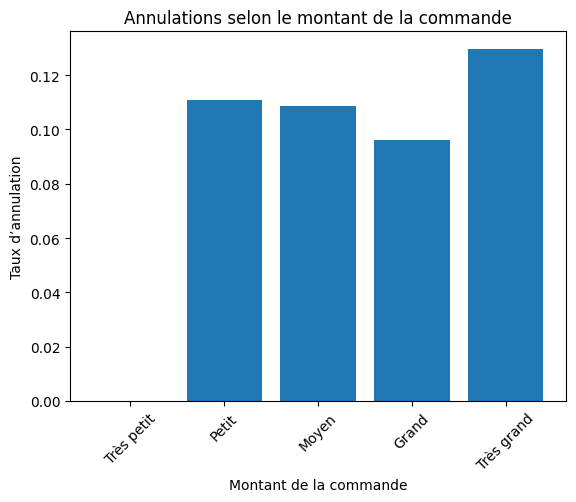

In [39]:
import matplotlib.pyplot as plt

plt.bar(taux_annulation['Tranche de montant'], taux_annulation['Taux d‚Äôannulation'])
plt.xlabel('Montant de la commande')
plt.ylabel('Taux d‚Äôannulation')
plt.title('Annulations selon le montant de la commande')
plt.xticks(rotation=45)
plt.show()

L‚Äôanalyse montre que les commandes de tr√®s grande valeur sont les plus √† risque d‚Äôannulation (taux > 13 %), probablement en raison d'une plus grande h√©sitation d‚Äôachat ou d‚Äôun risque logistique plus √©lev√©.
Les commandes de montant moyen √† grand pr√©sentent un risque plus faible, ce qui peut refl√©ter une zone de confiance des consommateurs.

L‚Äôanalyse montre que les commandes de tr√®s grande valeur sont les plus √† risque d‚Äôannulation (taux > 13 %), probablement en raison d'une plus grande h√©sitation d‚Äôachat ou d‚Äôun risque logistique plus √©lev√©.
Les commandes de montant moyen √† grand pr√©sentent un risque plus faible, ce qui peut refl√©ter une zone de confiance des consommateurs.

## Comapraison avec XG Boost

In [40]:
pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba > 0.35).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[16025  5663]
 [ 5352 16372]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74     21688
           1       0.74      0.75      0.75     21724

    accuracy                           0.75     43412
   macro avg       0.75      0.75      0.75     43412
weighted avg       0.75      0.75      0.75     43412



AUC: 0.842


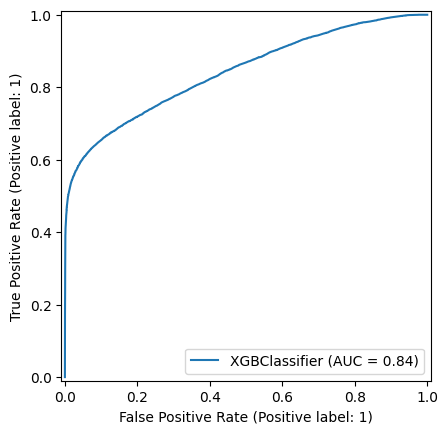

In [45]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba = xgb_model.predict_proba(X_test)[:, 1]
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)

## Am√©lioration de la pr√©cision de Random Forest

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [48]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

In [49]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='precision',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='precision', verbose=2)

In [51]:
best_rf = grid_search.best_estimator_

In [52]:
y_proba = best_rf.predict_proba(X_test)[:, 1]

In [53]:
y_pred_thresh = (y_proba > 0.55).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[20399  1289]
 [ 6765 14959]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84     21688
           1       0.92      0.69      0.79     21724

    accuracy                           0.81     43412
   macro avg       0.84      0.81      0.81     43412
weighted avg       0.84      0.81      0.81     43412

[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   9.9s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.9s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.4s
[CV] END class_weight=

/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/3900584420.py:30: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yasmine/Desktop/meÃÅmoire/env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


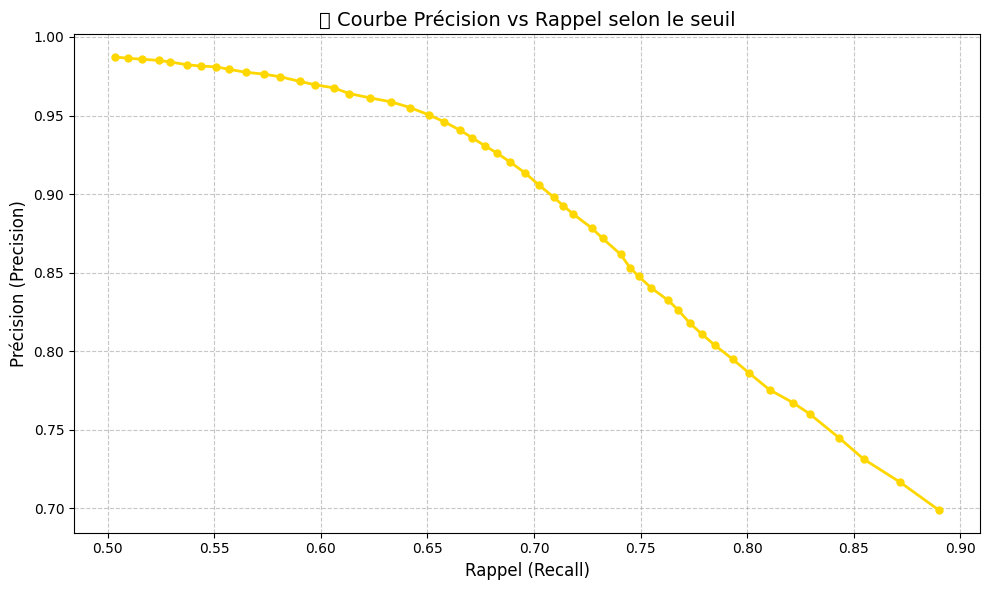

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Seuils √† tester
seuils = np.arange(0.3, 0.81, 0.01)

# Listes pour stocker pr√©cision et rappel
precisions = []
recalls = []

# Assure-toi d‚Äôavoir ex√©cut√© √ßa avant :
# y_proba = best_rf.predict_proba(X_test)[:, 1]
# y_test = tes vraies valeurs (labels)

for seuil in seuils:
    y_pred = (y_proba > seuil).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# üåü Tracer la courbe avec style jaune
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, marker='o', color='gold', linewidth=2, markersize=5)
plt.xlabel('Rappel (Recall)', fontsize=12)
plt.ylabel('Pr√©cision (Precision)', fontsize=12)
plt.title('üí° Courbe Pr√©cision vs Rappel selon le seuil', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()